<div align="center"> 
    
# Department of Information system
## College of Computer science, King Khalid University
## Abha, Kingdom of Saudi Arabia
## Academic Year 2022-2023 Semester 2
### Time series Lab project  
</div>

##Saudi Arabia Electricity Load Monthly by Region 
this project tries to forecast the electricity load in the western region according to the forecasting, try to build solutions how for electricity consumption

Read Data 

In [ ]:
df<- read.csv("saudi-arabia-electricity-load-monthly-by-region.csv",sep=";")


###Explor and Prepare Data 

In [ ]:
# show the frist five rows
head(df)


,Date,Indicator,Value
,<chr>,<chr>,<dbl>
1,2019-06,Central region - Average - (GW),16.6
2,2019-07,Eastern region - Maximum (GW),18.0
3,2019-07,Western region - Average - (GW),14.0
4,2019-09,Eastern region - Maximum (GW),18.9
5,2019-09,Western region - Maximum - (GW),16.4
6,2019-11,Southern region - Maximum - (GW),4.7


In [ ]:
# chek the data type of variables 
str(df)


'data.frame':	1584 obs. of  3 variables:
 $ Date     : chr  "2019-06" "2019-07" "2019-07" "2019-09" ...
 $ Indicator: chr  "Central region - Average - (GW)" "Eastern region - Maximum (GW)" "Western region - Average - (GW)" "Eastern region - Maximum (GW)" ...
 $ Value    : num  16.6 18 14 18.9 16.4 4.7 9.8 10.7 2.7 16 ...


In [ ]:
# change the date type to Date time 
library(lubridate)
df$Date<-ym(df$Date)
str(df)

'data.frame':	1584 obs. of  3 variables:
 $ Date     : Date, format: "2019-06-01" "2019-07-01" ...
 $ Indicator: chr  "Central region - Average - (GW)" "Eastern region - Maximum (GW)" "Western region - Average - (GW)" "Eastern region - Maximum (GW)" ...
 $ Value    : num  16.6 18 14 18.9 16.4 4.7 9.8 10.7 2.7 16 ...


In [ ]:
# show the number of category  in Indecator variables 
unique(df$Indicator)


[1] "Central region - Average - (GW)"  "Eastern region - Maximum (GW)"   
 [3] "Western region - Average - (GW)"  "Western region - Maximum - (GW)" 
 [5] "Southern region - Maximum - (GW)" "Central region - Maximum - (GW)" 
 [7] "Southern region - Minimum - (GW)" "Central region - Minimum - (GW)" 
 [9] "Eastern region - Average (GW)"    "Western region - Minimum - (GW)" 
[11] "Eastern region - Minimum (GW)"    "Southern region - Average - (GW)"

In [ ]:
# choose the spesfic category from  Indecator to apply for forcaseting 
avgW<- df[df$Indicator=='Western region - Average - (GW)',]


In [ ]:
head(avgW)


,Date,Indicator,Value
,<date>,<chr>,<dbl>
3,2019-07-01,Western region - Average - (GW),14.0
17,2012-09-01,Western region - Average - (GW),11.0
35,2013-04-01,Western region - Average - (GW),8.7
44,2013-06-01,Western region - Average - (GW),11.6
51,2013-11-01,Western region - Average - (GW),8.3
80,2015-01-01,Western region - Average - (GW),6.6


In [ ]:
str(avgW)


'data.frame':	132 obs. of  3 variables:
 $ Date     : Date, format: "2019-07-01" "2012-09-01" ...
 $ Indicator: chr  "Western region - Average - (GW)" "Western region - Average - (GW)" "Western region - Average - (GW)" "Western region - Average - (GW)" ...
 $ Value    : num  14 11 8.7 11.6 8.3 6.6 7.4 12.6 14.6 12.7 ...


Prepare data to forecasting 

In [ ]:
# remove Indicator column
avgW$Indicator<- NULL


In [ ]:
head(avgW)


,Date,Value
,<date>,<dbl>
3,2019-07-01,14.0
17,2012-09-01,11.0
35,2013-04-01,8.7
44,2013-06-01,11.6
51,2013-11-01,8.3
80,2015-01-01,6.6


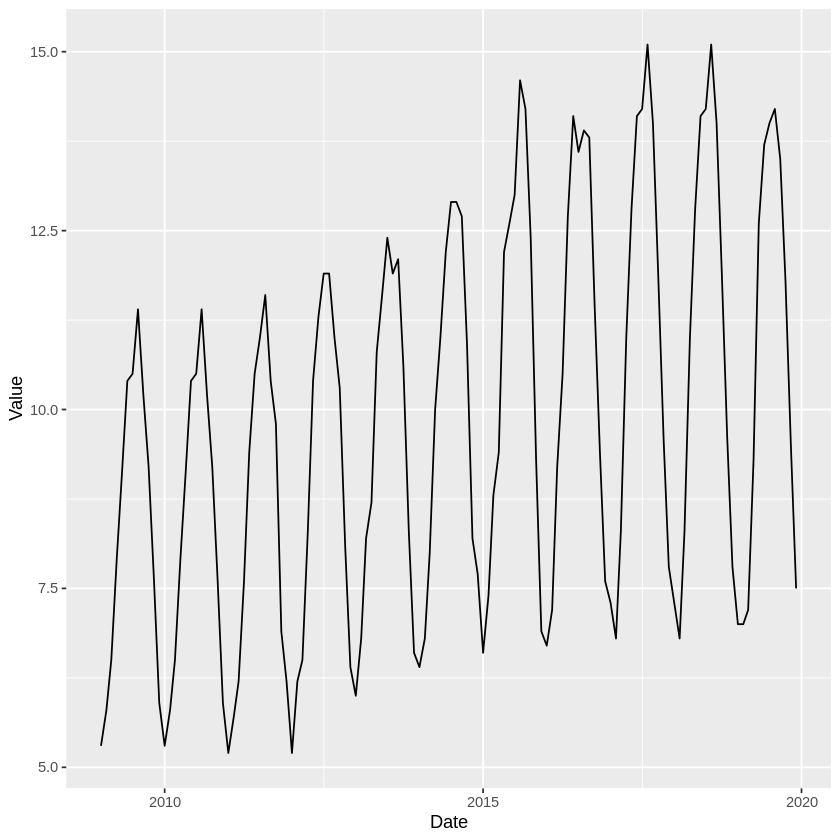

In [ ]:
# plot data 
library(ggplot2)
ggplot(avgW,aes(x=Date,y=Value))+
  geom_line()

# As show the time series is Trend and Seasonal 


In [ ]:
# the command for decomposition is stl , Saesonal, Terend and  Remainder decomposition
tsData2 <- ts(
  data=avgW$Value, 
  start = c(2009,1), 
  end = c(2020,12), 
  frequency = 12)
## Make a stl object 
xx=stl(tsData2, s.window="periodic")
stl(x = tsData2, s.window = "periodic")


 Call:
 stl(x = tsData2, s.window = "periodic")

Components
            seasonal     trend   remainder
Jan 2009  0.36647759 10.624707  3.00881568
Feb 2009  0.05640602 10.592468  0.35112593
Mar 2009  0.05466618 10.560229 -1.91489554
Apr 2009  0.16432283 10.539589  0.89608823
May 2009 -0.40102102 10.518949 -1.81792751
Jun 2009 -1.12885485 10.493527 -2.76467222
Jul 2009 -0.50668930 10.468106 -2.56141631
Aug 2009 -0.08145627 10.452792  2.22866422
Sep 2009  0.86877691 10.437478  3.29374460
Oct 2009  0.85102576 10.578922  1.27005266
Nov 2009  0.79993956 10.720365 -2.12030424
Dec 2009 -1.04359348 10.820083 -2.47648937
Jan 2010  0.36647759 10.919801  2.91372138
Feb 2010  0.05640602 10.780236 -3.53664227
Mar 2010  0.05466618 10.640671  4.40466236
Apr 2010  0.16432283 10.372517 -0.93683989
May 2010 -0.40102102 10.104363  2.89665837
Jun 2010 -1.12885485  9.808808  0.42004640
Jul 2010 -0.50668930  9.513254  1.49343504
Aug 2010 -0.08145627  9.099382 -2.81792548
Sep 2010  0.86877691  8.685509  1.445

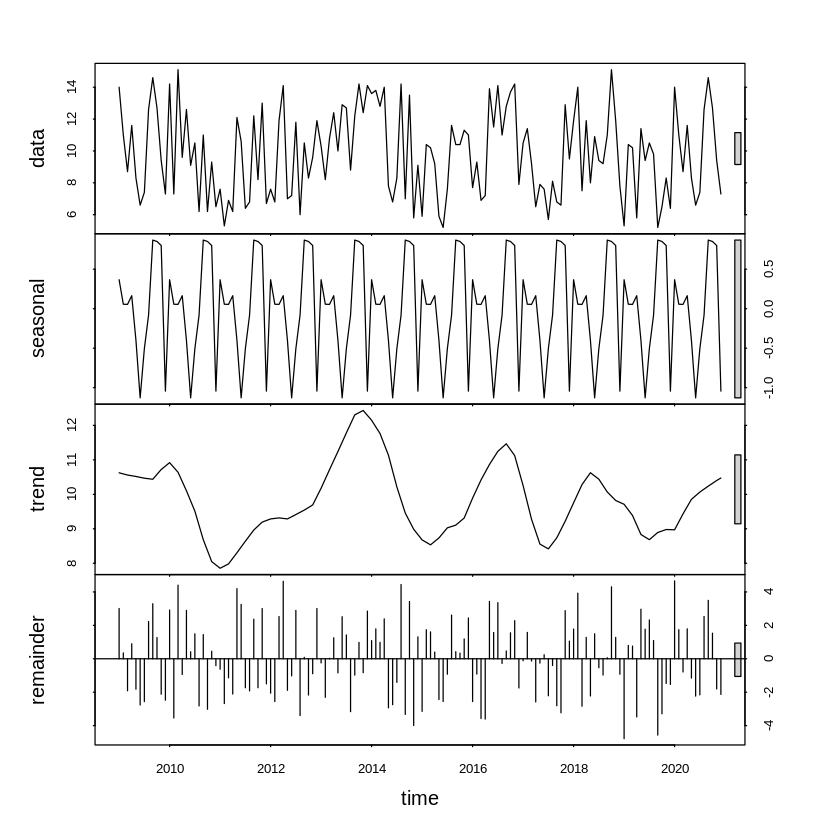

In [ ]:
#plot decomposition  
#first plot orginal data series 
#second plot sesonal 
#third plot trend 
#fouth plot noise 
plot(xx)

In [ ]:
# chek the class of data
class(avgW)


[1] "data.frame"

In [ ]:
install.packages("xts")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




           [,1]
2009-01-01  5.3
2009-02-01  5.8
2009-03-01  6.5
2009-04-01  7.9
2009-05-01  9.1
2009-06-01 10.4
2009-07-01 10.5
2009-08-01 11.4
2009-09-01 10.2
2009-10-01  9.2
2009-11-01  7.6
2009-12-01  5.9
2010-01-01  5.3
2010-02-01  5.8
2010-03-01  6.5
2010-04-01  7.9
2010-05-01  9.1
2010-06-01 10.4
2010-07-01 10.5
2010-08-01 11.4
2010-09-01 10.2
2010-10-01  9.2
2010-11-01  7.6
2010-12-01  5.9
2011-01-01  5.2
2011-02-01  5.7
2011-03-01  6.2
2011-04-01  7.6
2011-05-01  9.4
2011-06-01 10.5
2011-07-01 11.0
2011-08-01 11.6
2011-09-01 10.4
2011-10-01  9.8
2011-11-01  6.9
2011-12-01  6.2
2012-01-01  5.2
2012-02-01  6.2
2012-03-01  6.5
2012-04-01  8.3
2012-05-01 10.4
2012-06-01 11.3
2012-07-01 11.9
2012-08-01 11.9
2012-09-01 11.0
2012-10-01 10.3
2012-11-01  8.1
2012-12-01  6.4
2013-01-01  6.0
2013-02-01  6.8
2013-03-01  8.2
2013-04-01  8.7
2013-05-01 10.8
2013-06-01 11.6
2013-07-01 12.4
2013-08-01 11.9
2013-09-01 12.1
2013-10-01 10.6
2013-11-01  8.3
2013-12-01  6.6
2014-01-01  6.4
2014-02-

[1] TRUE

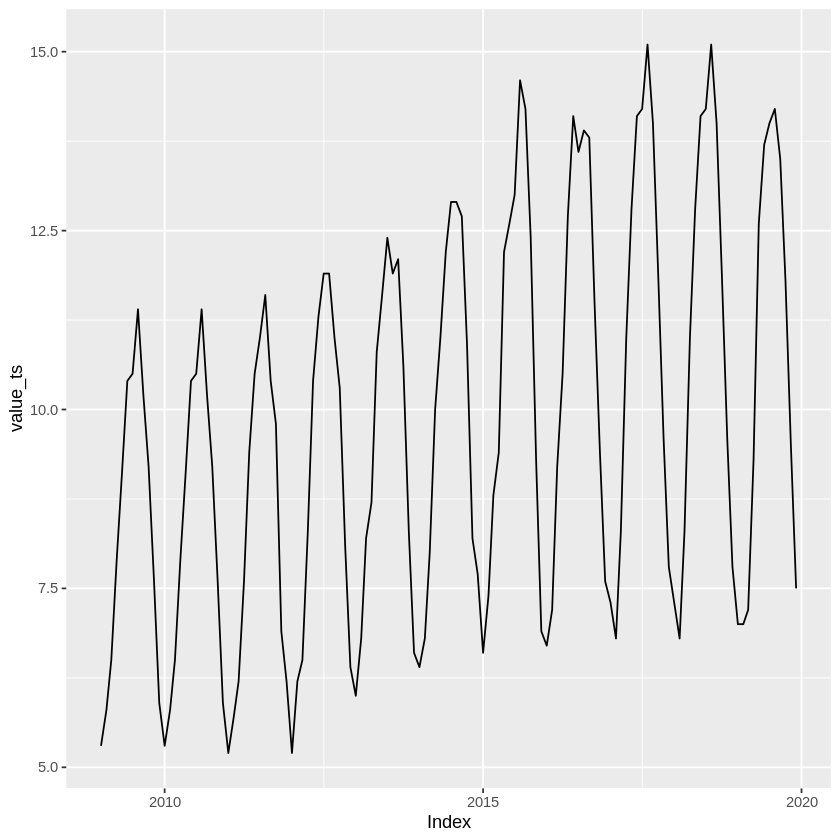

In [ ]:
# convert the class of dataframe to time series object 
library("xts")
value_ts <- xts(avgW$Value, avgW$Date)
value_ts 
is.xts(value_ts)
autoplot(value_ts)

In [ ]:
install.packages("tseries")
library(tseries)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# use Augmented Dickey-Fuller Test to chek stationary 
# stationay process has a mean and variances that do not change overtime and process dose not have trend 
## k=12 mounthly data 
adf.test(value_ts,k=12)


Warning message in adf.test(value_ts, k = 12):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  value_ts
Dickey-Fuller = 1.1069, Lag order = 12, p-value = 0.99
alternative hypothesis: stationary


ADF test it is  if null hypothesise -Non Stationary (DO not Reject if p-value > significance level = 1% 
here p-value = 0.99 so no Stationary 

In [ ]:
# using different to remove trend and seasonal
# apply first differences 
avg2<-diff(value_ts,differences = 1)


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


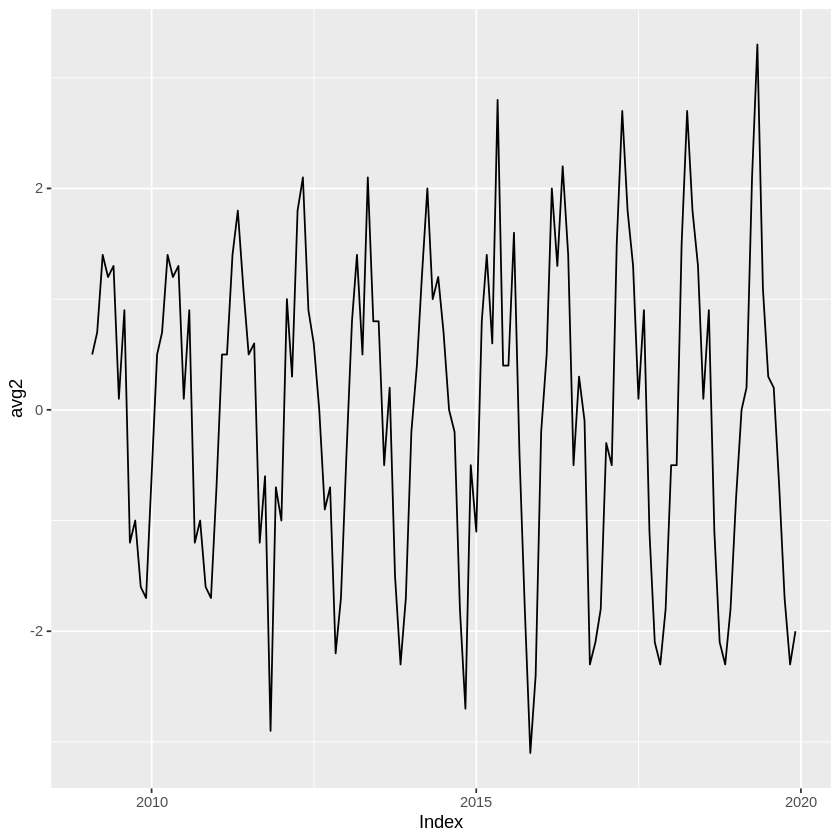

In [ ]:
# plot after differenes 
# look it stationary 
autoplot(avg2)


In [ ]:
# let apply ADF test for differenes 
adf.test(as.numeric(na.omit(avg2),k=12))


Warning message in adf.test(as.numeric(na.omit(avg2), k = 12)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  as.numeric(na.omit(avg2), k = 12)
Dickey-Fuller = -12.431, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Since p - value is less than significances level the first difference is Stationary 

The ACF and PACF plots to identify the q and p term of ARIMA model 

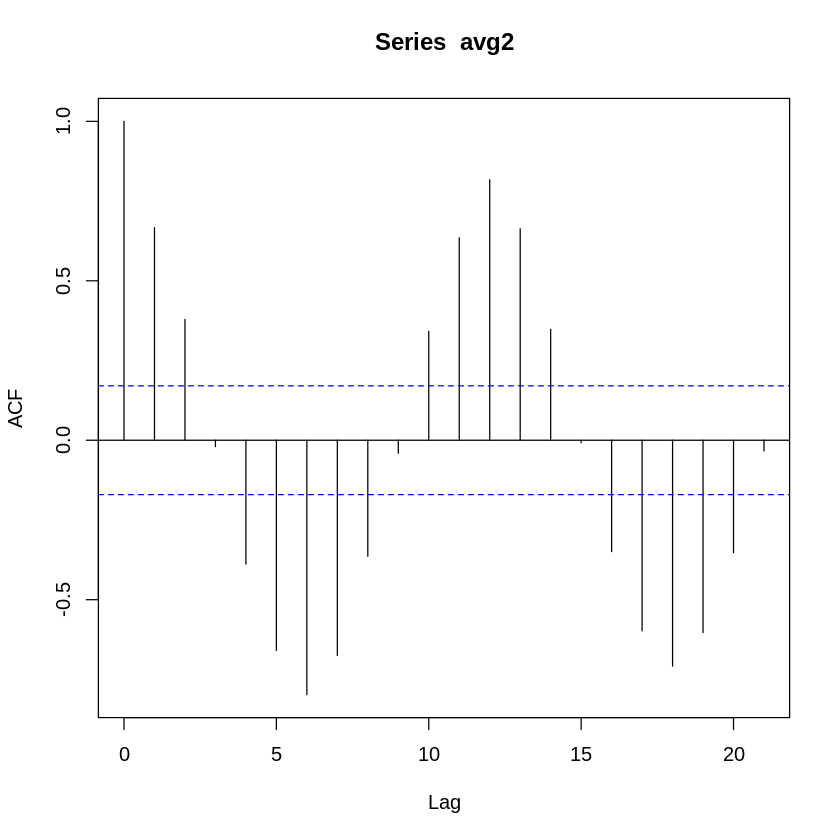

In [ ]:
# q=0 because lag take shape of Seasonal 
acf(avg2,na.action = na.pass)


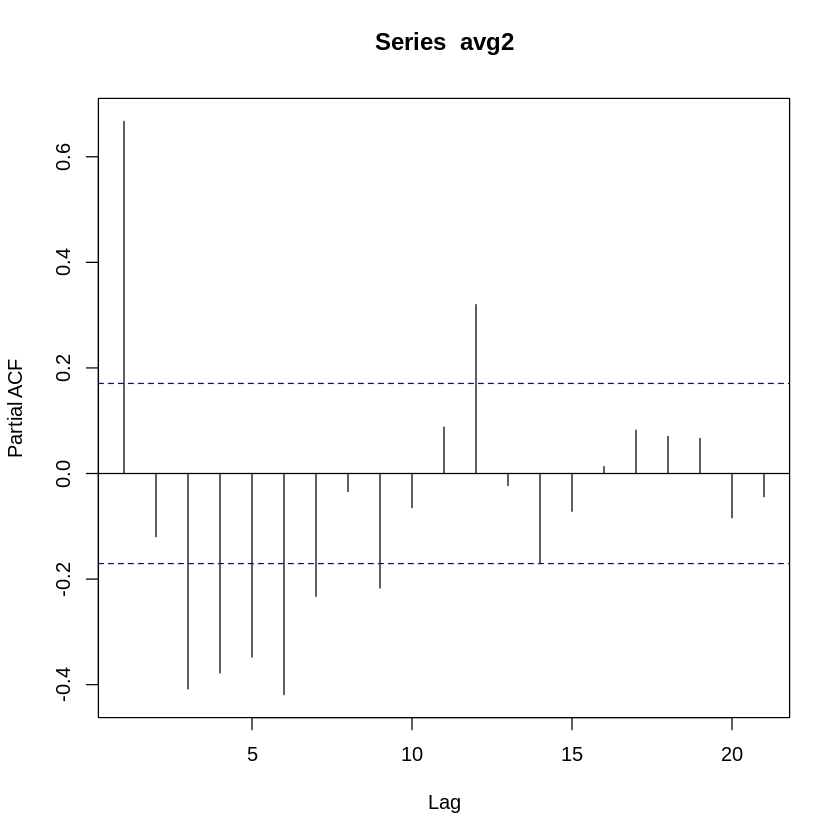

In [ ]:
# p= 7 because seven significances lags 
pacf(avg2,na.action = na.pass)


In [ ]:
install.packages("forecast")
library(forecast)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




###Create Model 

In [ ]:
# ARIMA model with order q= 7, d(diffrences)=1,p=0
tsMod<- arima(value_ts,order = c(7,1,0))


In [ ]:
# forecasting three years  
fcst<-forecast(tsMod,h=36)


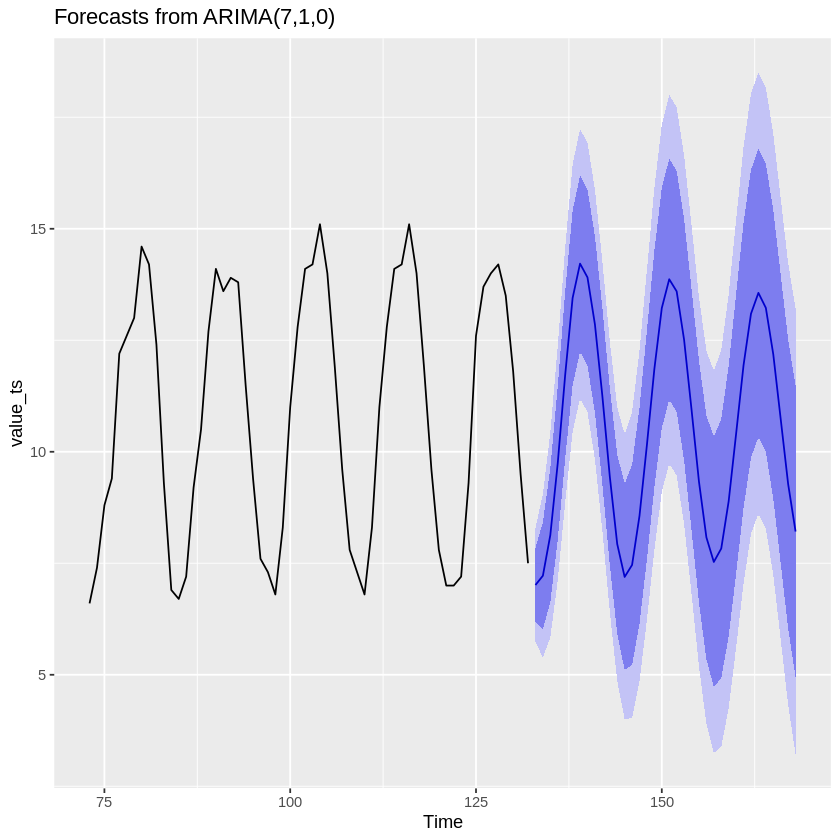

In [ ]:
# plot forecasting whith last five years 
autoplot(fcst,include = 60)


In [ ]:
#exponential smoothing model use if there is a trend and/or seasonality in the data, as this model explicitly models these components
tsMod2<- ets(value_ts)

In [ ]:
# forecasting three years  
fcst2<-forecast(tsMod2,h=36)


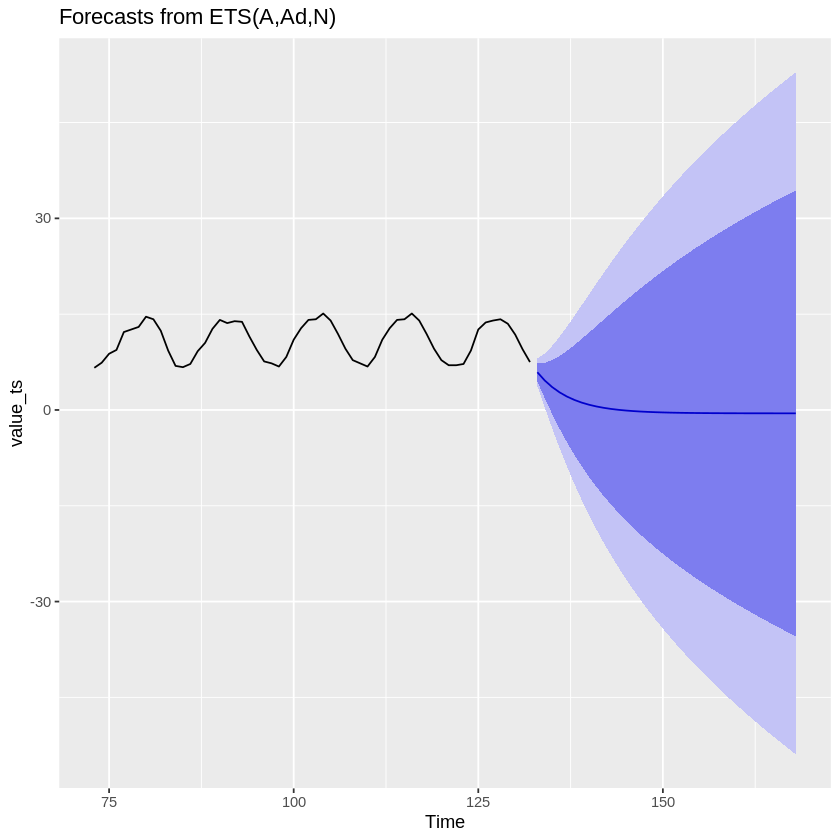

In [ ]:
# plot forecasting whith last five years 
autoplot(fcst2,include = 60)


### Evaluation 



Call:
arima(x = value_ts, order = c(7, 1, 0))

Coefficients:
         ar1     ar2      ar3      ar4      ar5      ar6      ar7
      0.0290  0.0539  -0.0893  -0.1149  -0.1645  -0.3992  -0.3509
s.e.  0.0823  0.0734   0.0726   0.0712   0.0717   0.0730   0.0823

sigma^2 estimated as 0.4252:  log likelihood = -132.39,  aic = 280.79

Training set error measures:
                     ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.05191649 0.6495964 0.5211638 0.2690814 5.513771 0.4444822
                    ACF1
Training set -0.07193122

	Ljung-Box test

data:  Residuals from ARIMA(7,1,0)
Q* = 58.669, df = 3, p-value = 1.131e-12

Model df: 7.   Total lags used: 10



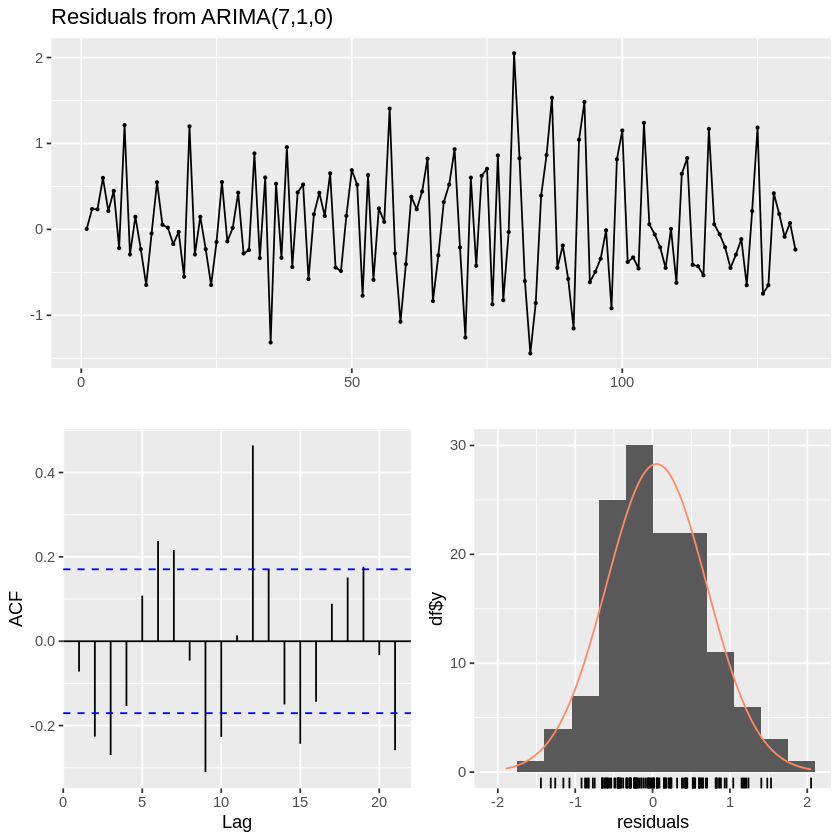

In [ ]:
# Evaluation of model ARIMA
print(summary(tsMod))
checkresiduals(tsMod)

ETS(A,Ad,N) 

Call:
 ets(y = value_ts) 

  Smoothing parameters:
    alpha = 0.9613 
    beta  = 0.8818 
    phi   = 0.8 

  Initial states:
    l = 2.9339 
    b = -1.1027 

  sigma:  1.1105

     AIC     AICc      BIC 
679.0948 679.7668 696.3916 

Training set error measures:
                      ME     RMSE       MAE     MPE     MAPE      MASE
Training set 0.001595829 1.089233 0.8844197 1.17256 9.799361 0.7542902
                  ACF1
Training set 0.1090856

	Ljung-Box test

data:  Residuals from ETS(A,Ad,N)
Q* = 70.83, df = 5, p-value = 6.883e-14

Model df: 5.   Total lags used: 10



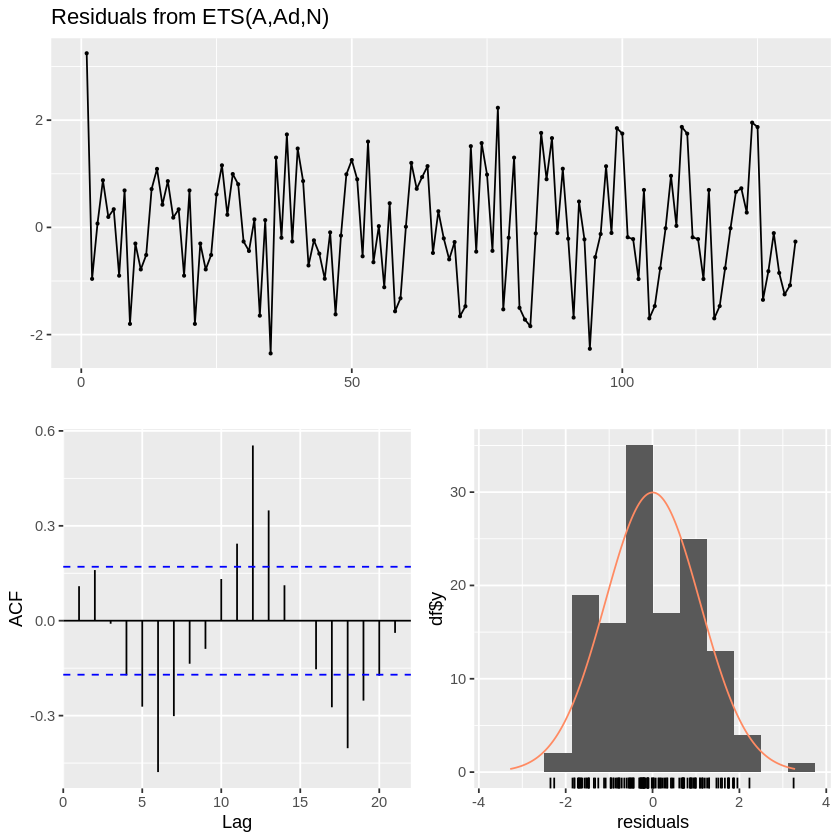

In [ ]:
# Evaluation of model exponential smoothing
print(summary(tsMod2))
checkresiduals(tsMod2)

In summary statistics of ARIMA model,AR seven models with different of one and AR coefficient estimates there are some significant and anther not significant. In the ARIMA model residuals plot, some lag inside the interval; there is not much correlation lag, but not perfect.RMSE of ARIMA model the differences between predicted values and observed values =0.64 and MAE is the average of the absolute values of the errors = 0.52.
The lower value of MAE and RMSE implies higher accuracy of a  model. ARIMA model is better than exponential smoothing. 